# 6.5 Unsupervised Machine Learning

### This script contains the following:

#### 1. Importing libraries and data and renaming columns
#### 2. The elbow technique
#### 3. k-means clustering

## Importing libraries and data and renaming columns

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.cluster import KMeans # Here is where you import the k-means algorithm from scikit-learn.
import pylab as pl # PyLab is a convenience module that bulk imports matplotlib.

In [2]:
# This option ensures the graphs you create are displayed in your notebook without the need to "call" them specifically.

%matplotlib inline

In [3]:
# importing data sets
path=r'/Users/isabelgonzalez/Desktop/Data Immersion/Achievement 6'

In [4]:
df = pd.read_csv(os.path.join(path, 'Data', 'Prepared Data', 'boat_sales_clean.csv'))

In [5]:
df.head()

,Eur Price,Boat Type,Manufacturer,Year Built,Length,Width,Material,Location,Views Last 7 Days,Boat Condition,Engine Type
0,3476.04,Motor Yacht,Rigiflex power boats,2017.0,4.00,1.90,NaN,Switzerland,226,new boat from stock,NaN
1,3490.00,Center console boat,Terhi power boats,2020.0,4.00,1.50,Thermoplastic,Germany,75,new boat from stock,NaN
2,3927.08,Sport Boat,Marine power boats,NaN,3.69,1.42,Aluminium,Switzerland,124,new boat from stock,NaN
3,3481.18,Sport Boat,Pioner power boats,2020.0,3.00,1.00,NaN,Denmark,64,new boat from stock,NaN
4,3399.00,Fishing Boat,Linder power boats,2019.0,3.55,1.46,Aluminium,Germany,58,new boat from stock,NaN


In [6]:
# Calling all NaN values for Year Built column
df_nan = df[df['Year Built'].isnull() == True]

df_nan

,Eur Price,Boat Type,Manufacturer,Year Built,Length,Width,Material,Location,Views Last 7 Days,Boat Condition,Engine Type
2,3927.08,Sport Boat,Marine power boats,NaN,3.69,1.42,Aluminium,Switzerland,124,new boat from stock,NaN
5,3802.08,Sport Boat,Linder power boats,NaN,4.03,1.56,Aluminium,Switzerland,132,new boat from stock,NaN
7,3333.33,Sport Boat,NaN,NaN,3.00,NaN,NaN,Denmark,134,Used boat,NaN
11,3625.00,Fishing Boat,Marine power boats,NaN,4.13,1.41,Aluminium,Switzerland,145,new boat from stock,NaN
15,4583.33,Deck Boat,Buster power boats,NaN,3.88,1.49,Aluminium,Switzerland,263,new boat from stock,Unleaded
...,...,...,...,...,...,...,...,...,...,...,...
9503,5208.33,Pilothouse,Lambro power boats,NaN,6.50,2.45,GRP,Switzerland,550,Used boat,Unleaded
9506,5197.92,Sport Boat,Pioner power boats,NaN,4.11,1.73,NaN,Switzerland,280,new boat on order,NaN
9507,5187.50,Sport Boat,Linder power boats,NaN,4.01,1.64,Aluminium,Switzerland,247,new boat from stock,NaN
9508,5156.25,Sport Boat,Marine power boats,NaN,3.99,1.52,Aluminium,Switzerland,150,new boat from stock,NaN


In [7]:
# Getting rid of all NaN values 
df_clean = df[df['Year Built'].isnull() == False]

In [8]:
# seperating numerical columns
sub = df_clean[['Eur Price','Year Built', 'Views Last 7 Days']]

sub

,Eur Price,Year Built,Views Last 7 Days
0,3476.04,2017.0,226
1,3490.00,2020.0,75
3,3481.18,2020.0,64
4,3399.00,2019.0,58
6,3750.00,1999.0,474
...,...,...,...
9509,5156.25,1984.0,288
9510,5104.17,1987.0,1116
9512,4499.00,2020.0,354
9513,4300.00,2018.0,266


## 2. The elbow technique

In [9]:
num_cl = range(1, 10) # Defines the range of potential clusters in the data.
kmeans = [KMeans(n_clusters=i) for i in num_cl] # Defines k-means clusters in the range assigned above.

In [10]:
score = [kmeans[i].fit(sub).score(sub) for i in range(len(kmeans))] # Creates a score that represents 
# a rate of variation for the given cluster option.

score

[-7392799201530582.0,
 -3123308454021289.5,
 -1736102486933974.5,
 -1008068435864256.1,
 -656672140786292.9,
 -464016751296731.44,
 -321928020245447.3,
 -234956991746532.1,
 -181861932767919.44]

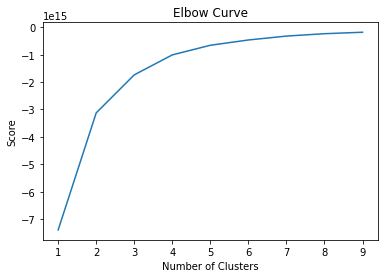

In [11]:
# Plot the elbow curve using PyLab.

pl.plot(num_cl,score)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show()

#####  Make an informed decision about the number of clusters you’ll use in your k-means algorithm based on the chart.

In this chart, there's a large jump from 1 to 4 on the x-axis, but after that, the curve straightens out. This means that the optimal count for clusters is 4.

## 3. k-means clustering

In [12]:
# Create the k-means object.
 
kmeans = KMeans(n_clusters = 4)

In [13]:
# Fit the k-means object to the data.

kmeans.fit(sub)

KMeans(n_clusters=4)

In [14]:
sub['clusters'] = kmeans.fit_predict(sub)

/var/folders/lp/8n1nk7lj0qddf17mns4btfgr0000gn/T/ipykernel_1356/3683309691.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sub['clusters'] = kmeans.fit_predict(sub)


In [15]:
sub.head()

,Eur Price,Year Built,Views Last 7 Days,clusters
0,3476.04,2017.0,226,0
1,3490.00,2020.0,75,0
3,3481.18,2020.0,64,0
4,3399.00,2019.0,58,0
6,3750.00,1999.0,474,0


In [16]:
sub['clusters'].value_counts()

0    8493
3     414
1      59
2       8
Name: clusters, dtype: int64

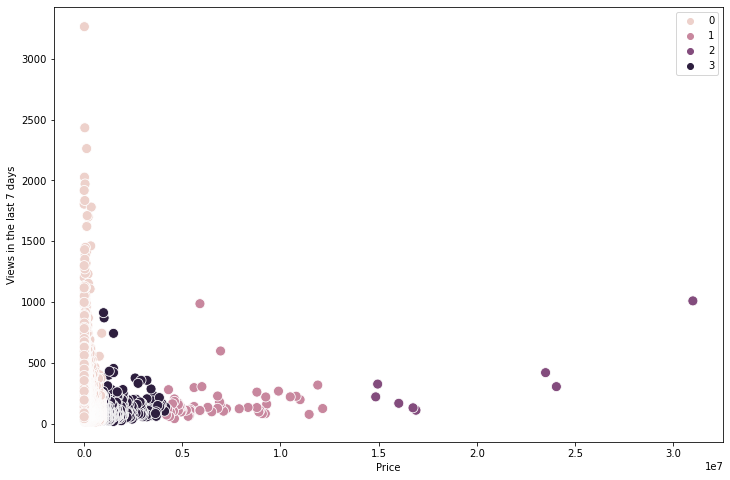

In [17]:
# Plot the clusters for the "Price per Unit" and "D.metro" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=sub['Eur Price'], y=sub['Views Last 7 Days'], hue=kmeans.labels_, s=100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('Price') # Label x-axis.
plt.ylabel('Views in the last 7 days') # Label y-axis.
plt.show()

##### Discuss how and why the clusters make sense. If they don’t make sense, however, this is also useful insight, as it means you’ll need to explore the data further.

The clusters make sense because you can see they are clustered into price groups, light pink(0) being the cheapest group and pink(1) being the most expensive. As the price groups increase you can see the price of the boats lower.

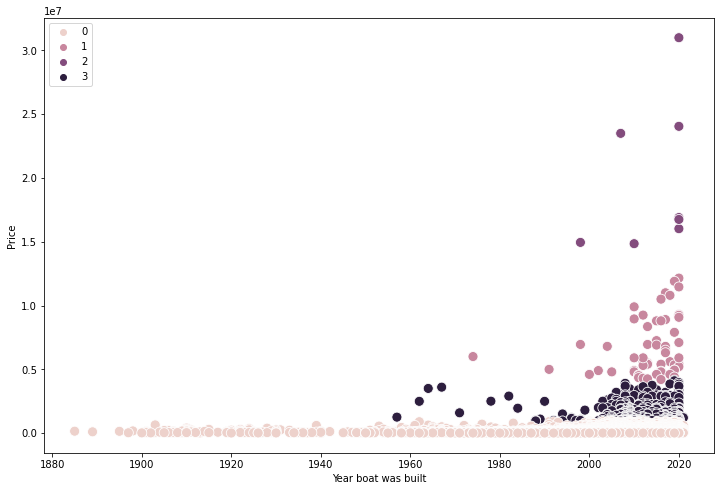

In [18]:
# Plot the clusters for the "Price per Unit" and "D.metro" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=sub['Year Built'], y=sub['Eur Price'], hue=kmeans.labels_, s=100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('Year boat was built') # Label x-axis.
plt.ylabel('Price') # Label y-axis.
plt.show()

##### Discuss how and why the clusters make sense. If they don’t make sense, however, this is also useful insight, as it means you’ll need to explore the data further.

The clusters make sense because you can see they are clustered into price groups again, light pink(0) being the cheapest group and pink(1) being the most expensive. With each increase in the price groups you can see less and less older boats. 

#### Discuss how and why the clusters make sense. If they don’t make sense, however, this is also useful insight, as it means you’ll need to explore the data further.

In [19]:
sub.loc[sub['clusters'] == 3, 'clusters'] = 'dark purple'
sub.loc[sub['clusters'] == 2, 'clusters'] = 'purple'
sub.loc[sub['clusters'] == 1, 'clusters'] = 'pink'
sub.loc[sub['clusters'] == 0, 'clusters'] = 'light pink'

/var/folders/lp/8n1nk7lj0qddf17mns4btfgr0000gn/T/ipykernel_1356/3925347488.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sub.loc[sub['clusters'] == 3, 'clusters'] = 'dark purple'


In [20]:
sub.groupby('clusters').agg({'Eur Price':['mean', 'median'], 
                         'Year Built':['mean', 'median'], 
                          'Views Last 7 Days':['mean', 'median']})

Eur Price               Year Built         Views Last 7 Days  \
                     mean      median         mean  median              mean   
clusters                                                                       
dark purple  1.677449e+06   1450000.0  2011.246377  2012.0        111.871981   
light pink   1.566137e+05     86900.0  2004.414341  2007.0        151.374897   
pink         6.677465e+06   5900000.0  2013.288136  2015.0        165.016949   
purple       1.975312e+07  16825000.0  2014.375000  2020.0        335.500000   

                    
            median  
clusters            
dark purple   92.0  
light pink   109.0  
pink         124.0  
purple       262.0

#### Calculate the descriptive statistics for your clusters using the groupby() function and discuss your findings. Propose what these results could be useful for in future steps of an analytics pipeline.

I found that the highest price boats are also built more recently and are prone to get less views than the cheaper boats.

In [21]:
sub.head()

,Eur Price,Year Built,Views Last 7 Days,clusters
0,3476.04,2017.0,226,light pink
1,3490.00,2020.0,75,light pink
3,3481.18,2020.0,64,light pink
4,3399.00,2019.0,58,light pink
6,3750.00,1999.0,474,light pink


In [22]:
sub.to_csv(os.path.join(path, 'Data','Prepared Data', 'clusters.csv'))